In [7]:
from __future__ import unicode_literals
from IPython.display import Image

import networkx

from pytopo import (
    TopoGraph,
    NetworkNode, RouterNode, SwitchNode, ServerNode, FirewallNode,
    S5700Node, LinkproofNode,
)

In [8]:
# graph

g = TopoGraph()

In [9]:
# nodes

node_network1 = NetworkNode('inet1', graph=g)
node_network2 = NetworkNode('inet2', graph=g)

S5700Node('s5700_01', 's5700-01', graph=g)
S5700Node('s5700_02', 's5700-02', graph=g)
S5700Node('s5700_03', 's5700-03', graph=g)
S5700Node('s5700_04', 's5700-04', graph=g)

LinkproofNode('linkproof_01', 'LinkProof-01', graph=g)
LinkproofNode('linkproof_02', 'LinkProof-02', graph=g)

FirewallNode('firewall', graph=g)
FirewallNode('firewall_01', 'USG 5300-01', graph=g)
FirewallNode('firewall_02', 'USG 5300-02', graph=g)

SwitchNode('CE12800_01', 'CE12800-01', graph=g)
SwitchNode('CE12800_02', 'CE12800-02', graph=g)

# node_router = RouterNode('router', graph=g)
# node_server1 = ServerNode('server_1', graph=g)
# node_server2 = ServerNode('server_2', graph=g)
# node_server3 = ServerNode('server_3', graph=g)

In [10]:
# rank

g.set_same_rank(['s5700_01', 's5700_02'])
g.set_same_rank(['linkproof_01', 'linkproof_02'])
g.set_same_rank(['s5700_03', 's5700_04'])
g.set_same_rank(['firewall_01', 'firewall_02'])
# g.set_same_rank(['CE12800_01', 'CE12800_02'])
g.set_same_rank(['CE12800_01', 'CE12800_02'], name='cluster_CE12800', color='red', style='dotted', rankdir='TB')

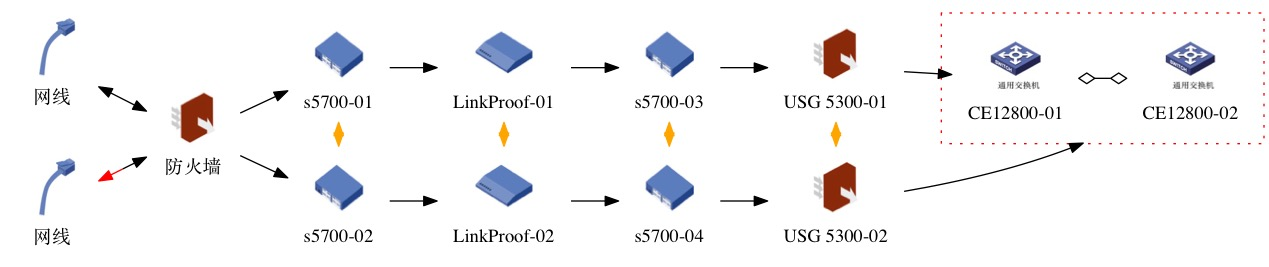

In [11]:
# edges

g.add_edge('inet1', 'firewall', dir='both')
g.add_edge('inet2', 'firewall', color='red:black;0.5', dir='both')

g.add_edge('firewall', 's5700_01')
g.add_edge('firewall', 's5700_02')
# g.add_edge('s5700_01', 's5700_02', color='orange', dir='both')

g.add_edge('s5700_01', 'linkproof_01')
g.add_edge('s5700_02', 'linkproof_02')
g.add_edge('s5700_01', 's5700_02', color='orange', dir='both')

g.add_edge('linkproof_01', 's5700_03')
g.add_edge('linkproof_02', 's5700_04')
g.add_edge('linkproof_01', 'linkproof_02', color='orange', dir='both')

g.add_edge('s5700_03', 'firewall_01')
g.add_edge('s5700_04', 'firewall_02')
g.add_edge('s5700_03', 's5700_04', color='orange', dir='both')

g.add_edge('firewall_01', 'CE12800_01')
g.add_edge('firewall_02', 'CE12800_02', lhead='cluster_CE12800')
g.add_edge('firewall_01', 'firewall_02', color='orange', dir='both')

g.add_edge('CE12800_01', 'CE12800_02', arrowhead='odiamond', dir='both', arrowtail='odiamond')


# g.add_edge('switch', 'router')
# g.add_edge('router', 'server_1')
# g.add_edge('router', 'server_2')
# g.add_edge('router', 'server_3', color='red:green;0.5', dir='both', label='<<BR/><FONT COLOR="red">上传</FONT>/<FONT COLOR="green">下载</FONT>>')

g.draw('./topo.jpg')
Image('./topo.jpg')